# Oscilloscope Analaysis for Lab 28

#### Header info

In [2]:
#Import needed libraries
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import csv
import os,platform
from scipy.optimize import curve_fit
import scipy
from scipy.fft import fft, rfft, irfft,ifft,fftfreq
#"check git"
#Read in the runlist and save as dataframe
Runlist= pd.read_table("./Runlist.tsv")
Runlist["RN"]=pd.to_numeric(Runlist["RN"])

#varible for determining the lab pc or other pc, Check if windows or not, then try to grab pc name
pcname=""
if platform.system() == "Windows":
    pcname=platform.uname().node
else:
    try:
        pcname=os.uname()[1]
    except:
        print("Issue with finding pc name")

env_var_wavefromloc ="" #varible for location of waveform data. 
data_dir_mod_old="" #varible for small difference in storage managment between pc 1 and 2
if pcname=='PHYS-PSB02802': #Lab pc 2, (Labview pc)
    env_var_wavefromloc ="A:/DATA/waveforms/"
    env_var_waveformloc_old="C:/Users/KK_Lab28_1/Documents/Waveforms/"
    data_dir_mod_old=""

elif pcname=="PHYS-PSB02801": #Lab pc 1, (solidworks pc)
    env_var_wavefromloc ="data/waveforms/" #This is true for Jason's work atm (June 10th) Needs Updateing to global or user friendly verison
    data_dir_mod_old="/"


## Functions 

In [3]:


#def grab_waveform_avg(waveform_path):
if 1==1:
    Runs=[]

    if 1==1:
        #print(waveform_path)
        dirlist = glob.glob(waveform_path+"*")
        #print(dirlist)
        for  dir in dirlist:
            dir = dir.replace("\\","/")
            subname= dir.replace(waveform_path,"")
            delim="-"
            name_sep= subname.split(delim)
            
            subname=subname.replace("\\","")
            subname=subname.replace(str(waveform_date),"")
            subname=subname.replace("%sL"%(delim),"L")
                 
            if "noise" in dir:
                LaserCur=0
                Voltags=[0,0,0]
                        
            key="L"
            item =[ i for i in name_sep if i.find(key) >= 0]
            
            result=[ i.replace(key,"") for i in item ]
            LaserCur=result[0] if len(result)>0  else 0

            key="C"
            item =[ i for i in name_sep if i.find(key) >= 0]
            result=[ i.replace(key,"") for i in item ]
            CathPot=  result[0] if len(result)>0  else 0
            print(subname,result)

            key="G"
            item =[ i for i in name_sep if i.find(key) >= 0]
            result=[ i.replace(key,"") for i in item ]
            GridPot=  result[0] if len(result)>0  else 0

            key="A"
            item =[ i for i in name_sep if i.find(key) >= 0]
            result=[ i.replace(key,"") for i in item ]
            AnodePot=  result[0] if len(result)>0  else 0

            #print("check" ,spec_loc,Apos_end)
            #print(stringtest[:Apos_end])
            #if AnodePos

            Voltags=[CathPot,GridPot,AnodePot]
          

            #Build up file name from the base name and path
            subname=subname.replace("-n","n")
            #print(waveform_path)
            file_base=waveform_path+"/"+str(waveform_date)+delim +subname
            if subname.find("vac_uv")>=0:
                continue
            #print(file_base)
            file_list= glob.glob(file_base+"/*.csv")

            #print("list\n",file_list)
            #prepare list for each channel for every waveform
            waveforms=[]
            ChAs=[] 
            ChBs=[]
            ChCs=[]
            Times=[]
            #print(file_base)
            if len(file_list)<0:
                print("No files found")
                break
        #        return 0

            #Loop through each file(waveform) 
            print("Number of waveforms: ", len(file_list))
            for file in file_list:
                #print("/t",file)
                waveform=pd.read_csv(file,skiprows=[1,2])#Read in the csv info into datafram
                
                #Grab each column and build 2D array with time steps for each channel then appended through each waveform
                Times.append(np.array(waveform["Time"]))
                ChAs.append(np.array(waveform["Channel A"]))
                ChBs.append(np.array(waveform["Channel B"]))
                ChCs.append(np.array(waveform["Channel C"]))
                

                            
            #average each channel
            Time=np.average(Times, axis=0)
            ChA=np.average(ChAs, axis=0)*1000
            ChB=np.average(ChBs, axis=0)
            ChC=np.average(ChCs, axis=0)

            waveform_dict={}
            waveform_dict["Time"]=Time
            waveform_dict["Pickoff"]=ChA
            waveform_dict["PreAmp"]=ChB
            waveform_dict["Shaper"]=ChC

            waveform_dict["LaserCur"]=LaserCur
            waveform_dict["Cathode"]=int(Voltags[0])
            waveform_dict["Grid"]   =int(Voltags[1])
            waveform_dict["Anode"]  =int(Voltags[2])
            waveform_dict["Info"]   =name_sep[-2]+"-" +name_sep[-1]
 
        # print(waveform_dict["LaserCur"])
            Runs.append(waveform_dict)
        print(len(Runs))
    #    return waveform_dict


#        return Runs



NameError: name 'waveform_path' is not defined

In [ ]:
waveform_date=20231110
waveform_path="%s%s"%(env_var_waveformloc_old,str(waveform_date))

Runs= grab_waveform_avg(waveform_path)


C:/Users/KK_Lab28_1/Documents/Waveforms/20231110
[]
0


In [ ]:
print(waveform_path[-1])


glob.glob("C:/Users/KK_Lab28_1/Documents/Waveforms/20231110*")

0


['C:/Users/KK_Lab28_1/Documents/Waveforms\\20231110-L23-C200-G0-A0-anode',
 'C:/Users/KK_Lab28_1/Documents/Waveforms\\20231110-L23-C200-G0-A0-cathode',
 'C:/Users/KK_Lab28_1/Documents/Waveforms\\20231110-L23-C200-G0-A0-grid',
 'C:/Users/KK_Lab28_1/Documents/Waveforms\\20231110-L24-C300-G0-A0-anode',
 'C:/Users/KK_Lab28_1/Documents/Waveforms\\20231110-L25-C1000-G0-A100-anode',
 'C:/Users/KK_Lab28_1/Documents/Waveforms\\20231110-L25-C500-G0-A100-anode',
 'C:/Users/KK_Lab28_1/Documents/Waveforms\\20231110-L26-C250-G0-A100-anode',
 'C:/Users/KK_Lab28_1/Documents/Waveforms\\20231110-noise']

# Analysis

# July 10th data

## Run 1 = vac

Text(0.5, 1.0, 'Vac signal on 20240711')

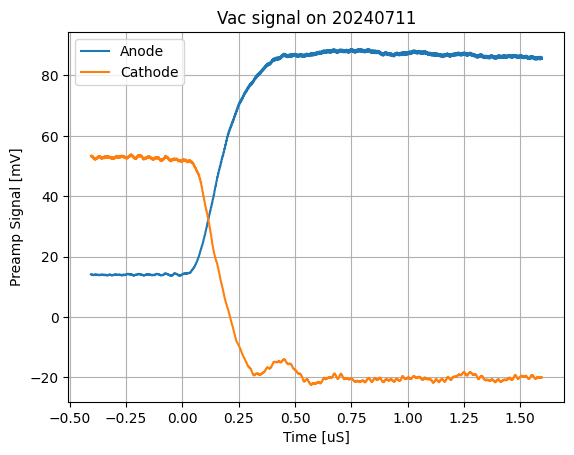

In [ ]:
wafeform_path="/Users/KK_Lab28_1/Documents/Waveforms/" # Path for data on July 7th

waveform_date="240710"
runnumber="00001"

waveform_dir=wafeform_path+waveform_date+"_"+runnumber
waveform_wavenumber="0001"
waveform_filename=waveform_date+"_"+runnumber+"_"+waveform_wavenumber
waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
DF=pd.read_csv(waveform_fullpath,skiprows=[1])
DF["Avg UV"]=DF["Avg UV"]*1000 # Change from V to mV


plt.errorbar(x=DF["Time"],y=DF["Avg Anode"], label="Anode")
plt.errorbar(x=DF["Time"],y=DF["Avg UV"], label="Cathode")

plt.xlabel("Time [uS]")
plt.ylabel("Preamp Signal [mV]")
plt.grid()
plt.legend()
plt.title("Vac signal on 20240711")

Text(0.5, 1.0, 'Vac signal on 20240711')

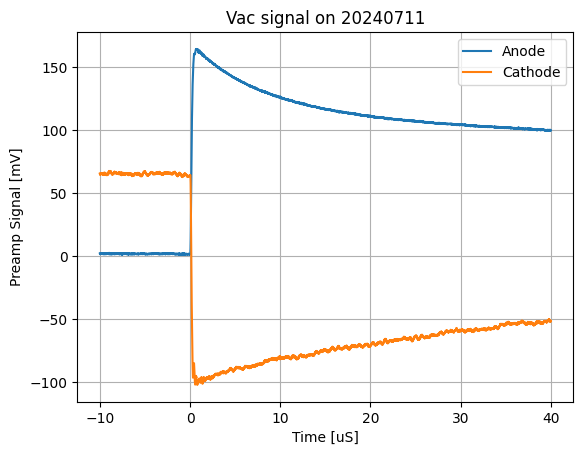

In [ ]:
wafeform_path="/Users/KK_Lab28_1/Documents/Waveforms/" # Path for data on July 7th

waveform_date="240710"
runnumber="00001"

waveform_dir=wafeform_path+waveform_date+"_"+runnumber
waveform_wavenumber="1"
waveform_filename=waveform_date+"_"+runnumber+"_"+waveform_wavenumber
waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
DF=pd.read_csv(waveform_fullpath,skiprows=[1])
DF["Avg UV"]=DF["Avg UV"]*1000 # Change from V to mV


plt.errorbar(x=DF["Time"],y=DF["Avg Anode"], label="Anode")
plt.errorbar(x=DF["Time"],y=DF["Avg UV"], label="Cathode")

plt.xlabel("Time [uS]")
plt.ylabel("Preamp Signal [mV]")
plt.grid()
plt.legend()
plt.title("Vac signal on 20240711")

## Run 3

Text(0.5, 1.0, 'Vac signal on 20240711')

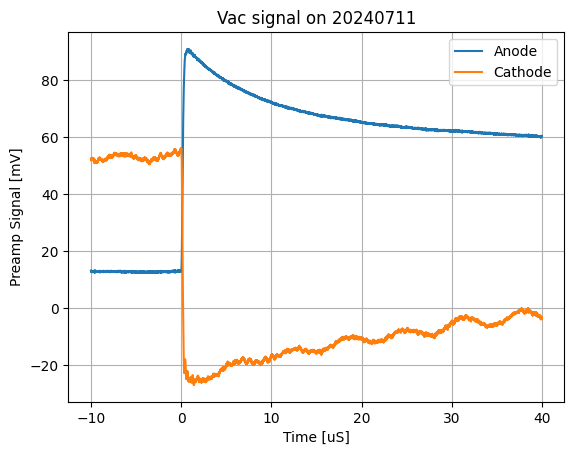

In [ ]:
wafeform_path="/Users/KK_Lab28_1/Documents/Waveforms/" # Path for data on July 7th

waveform_date="240710"
runnumber="00003"

waveform_dir=wafeform_path+waveform_date+"_"+runnumber
waveform_wavenumber="1"
waveform_filename=waveform_date+"_"+runnumber+"_"+waveform_wavenumber
waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
DF=pd.read_csv(waveform_fullpath,skiprows=[1])
DF["Avg UV"]=DF["Avg UV"]*1000 # Change from V to mV


plt.errorbar(x=DF["Time"],y=DF["Avg Anode"], label="Anode")
plt.errorbar(x=DF["Time"],y=DF["Avg UV"], label="Cathode")

plt.xlabel("Time [uS]")
plt.ylabel("Preamp Signal [mV]")
plt.grid()
plt.legend()
plt.title("Vac signal on 20240711")

## Run 4

Text(0.5, 1.0, 'Vac signal on 20240711')

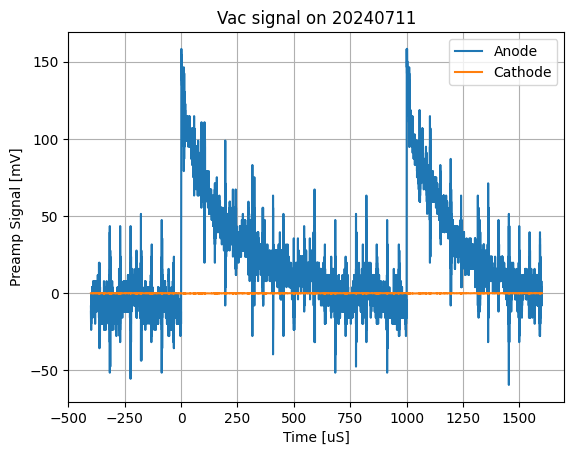

In [4]:
wafeform_path="/Users/KK_Lab28_1/Documents/Waveforms/" # Path for data on July 7th

waveform_date="240710"
runnumber="00004"

waveform_dir=wafeform_path+waveform_date+"_"+runnumber
waveform_wavenumber="2"
waveform_filename=waveform_date+"_"+runnumber+"_"+waveform_wavenumber
waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
DF=pd.read_csv(waveform_fullpath,skiprows=[1])
DF["Avg UV"]=DF["Avg UV"]*1000 # Change from V to mV
DF["Time"]=DF["Time"]*1000 # Change from mS to uS


plt.errorbar(x=DF["Time"],y=DF["Channel Anode"], label="Anode")
plt.errorbar(x=DF["Time"],y=DF["Channel UV"], label="Cathode")

plt.xlabel("Time [uS]")
plt.ylabel("Preamp Signal [mV]")
plt.grid()
plt.legend()
plt.title("Vac signal on 20240711")

In [3]:
os.path.exists

<function genericpath.exists(path)>

# Grabbing data form early aug

Text(0.5, 1.0, 'Gas Signal on 20240801')

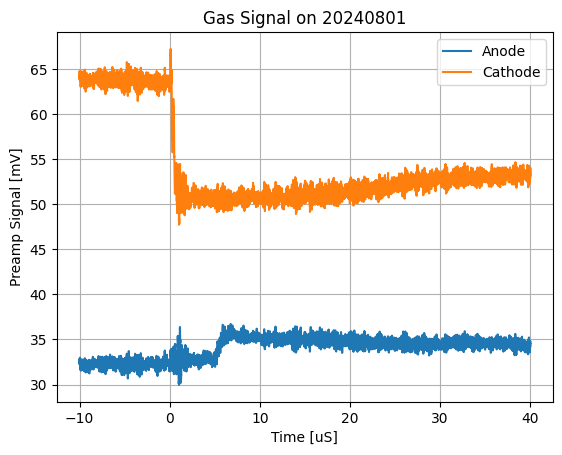

In [26]:
#wafeform_path="/Users/KK_Lab28_1/Documents/Waveforms/" # Path for data on July 7th
wafeform_path="A:/DATA/waveforms/"
waveform_date="20240801"
runnumber="00029"


waveform_dir=wafeform_path+waveform_date+"-"+runnumber
waveform_wavenumber="10"
waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
DF=pd.read_csv(waveform_fullpath,skiprows=[1])
try:
    DF["Avg UV"]=DF["Avg UV (2)"]*1000 # Change from V to mV
except:
    DF["Avg UV"]=DF["Avg UV"]*1000 # Change from V to mV
DF["Time"]=DF["Time"] # Change from mS to uS


plt.errorbar(x=DF["Time"],y=DF["Avg Anode"]*1000, label="Anode")
plt.errorbar(x=DF["Time"],y=DF["Avg UV"], label="Cathode")

plt.xlabel("Time [uS]")
plt.ylabel("Preamp Signal [mV]")
plt.grid()
plt.legend()
plt.title("Gas Signal on 20240801")
#plt.xlim(-1000,10000)

# Data form Sept 17

Run:  00054  Anode str:  1.951637699999992  Cathode str:  7.7283449
Run:  00062  Anode str:  1.806094299999998  Cathode str:  6.118642099999999
Run:  00063  Anode str:  1.5500383000000042  Cathode str:  4.763031699999999


Text(0.5, 1.0, 'Gas Signal on 20240917')

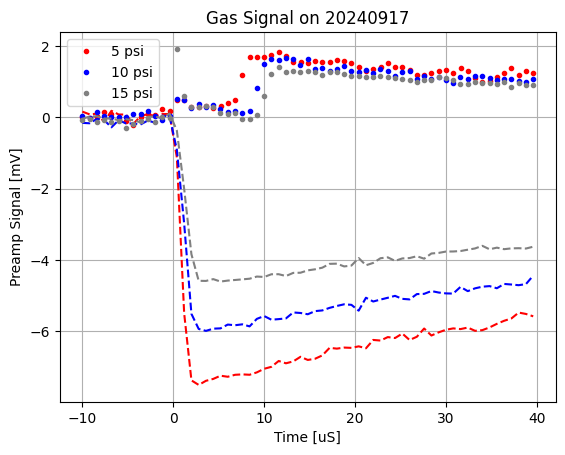

In [45]:
#wafeform_path="/Users/KK_Lab28_1/Documents/Waveforms/" # Path for data on July 7th
wafeform_path="A:/DATA/waveforms/"
waveform_date="20240917"
runnumber="00054"

stepcount=200
waveform_dir=wafeform_path+waveform_date+"-"+runnumber
waveform_wavenumber="10"
waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
DF=pd.read_csv(waveform_fullpath,skiprows=[1])



anodenorm=np.average(DF["Average Anode (2)"][:100])
cathnorm=np.average(DF["Average Cathode (2)"][:100])


plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Anode (2)"][::stepcount] - anodenorm, color= "red", fmt=".",label="5 psi")
plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Cathode (2)"][::stepcount] - cathnorm, color= "red", fmt="--",)
Anode_amp   =abs(np.average(DF["Average Anode (2)"][:100])-np.max(DF["Average Anode (2)"][2700:]))
Cathode_amp =abs(np.average(DF["Average Cathode (2)"][:100])-np.min(DF["Average Cathode (2)"]))
print("Run: ",runnumber," Anode str: ", Anode_amp, " Cathode str: ", Cathode_amp)


runnumber="00062"


waveform_dir=wafeform_path+waveform_date+"-"+runnumber
waveform_wavenumber="10"
waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
DF=pd.read_csv(waveform_fullpath,skiprows=[1])


anodenorm=np.average(DF["Average Anode (2)"][:100])
cathnorm=np.average(DF["Average Cathode (2)"][:100])

plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Anode (2)"][::stepcount] - anodenorm, color= "Blue", fmt=".",label="10 psi")
plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Cathode (2)"][::stepcount] - cathnorm, color= "Blue", fmt="--",)
Anode_amp   =abs(np.average(DF["Average Anode (2)"][:100])-np.max(DF["Average Anode (2)"][2700:]))
Cathode_amp =abs(np.average(DF["Average Cathode (2)"][:100])-np.min(DF["Average Cathode (2)"]))
print("Run: ",runnumber," Anode str: ", Anode_amp, " Cathode str: ", Cathode_amp)

runnumber="00063"


waveform_dir=wafeform_path+waveform_date+"-"+runnumber
waveform_wavenumber="10"
waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
DF=pd.read_csv(waveform_fullpath,skiprows=[1])

anodenorm=np.average(DF["Average Anode (2)"][:100])
cathnorm=np.average(DF["Average Cathode (2)"][:100])

plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Anode (2)"][0::stepcount] - anodenorm, color= "Gray", fmt=".",label="15 psi")
plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Cathode (2)"][::stepcount] - cathnorm, color= "Gray", fmt="--",)


Anode_amp   =abs(np.average(DF["Average Anode (2)"][:100])-np.max(DF["Average Anode (2)"][2700:]))
Cathode_amp =abs(np.average(DF["Average Cathode (2)"][:100])-np.min(DF["Average Cathode (2)"]))
print("Run: ",runnumber," Anode str: ", Anode_amp, " Cathode str: ", Cathode_amp)

plt.xlabel("Time [uS]")
plt.ylabel("Preamp Signal [mV]")
plt.grid()
plt.legend()
plt.title("Gas Signal on 20240917")
#plt.xlim(-1000,10000)



Text(0.5, 1.0, 'Gas Signal on 20240917')

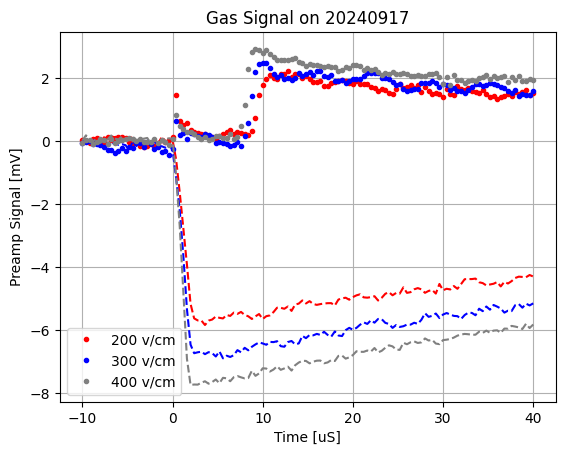

In [29]:
#wafeform_path="/Users/KK_Lab28_1/Documents/Waveforms/" # Path for data on July 7th
wafeform_path="A:/DATA/waveforms/"
waveform_date="20240917"
runnumber="00064"

stepcount=100
waveform_dir=wafeform_path+waveform_date+"-"+runnumber
waveform_wavenumber="10"
waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
DF=pd.read_csv(waveform_fullpath,skiprows=[1])



anodenorm=np.average(DF["Average Anode (2)"][:100])
cathnorm=np.average(DF["Average Cathode (2)"][:100])


plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Anode (2)"][::stepcount] - anodenorm, color= "red", fmt=".",label="200 v/cm")
plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Cathode (2)"][::stepcount] - cathnorm, color= "red", fmt="--",)



runnumber="00065"


waveform_dir=wafeform_path+waveform_date+"-"+runnumber
waveform_wavenumber="10"
waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
DF=pd.read_csv(waveform_fullpath,skiprows=[1])


anodenorm=np.average(DF["Average Anode (2)"][:100])
cathnorm=np.average(DF["Average Cathode (2)"][:100])

plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Anode (2)"][::stepcount] - anodenorm, color= "Blue", fmt=".",label="300 v/cm")
plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Cathode (2)"][::stepcount] - cathnorm, color= "Blue", fmt="--",)


runnumber="00066"


waveform_dir=wafeform_path+waveform_date+"-"+runnumber
waveform_wavenumber="10"
waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
DF=pd.read_csv(waveform_fullpath,skiprows=[1])

anodenorm=np.average(DF["Average Anode (2)"][:100])
cathnorm=np.average(DF["Average Cathode (2)"][:100])

plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Anode (2)"][0::stepcount] - anodenorm, color= "Gray", fmt=".",label="400 v/cm")
plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Cathode (2)"][::stepcount] - cathnorm, color= "Gray", fmt="--",)




plt.xlabel("Time [uS]")
plt.ylabel("Preamp Signal [mV]")
plt.grid()
plt.legend()
plt.title("Gas Signal on 20240917")
#plt.xlim(-1000,10000)

## Run55 cathode off

Text(0.5, 1.0, 'Gas Signal on 20240917')

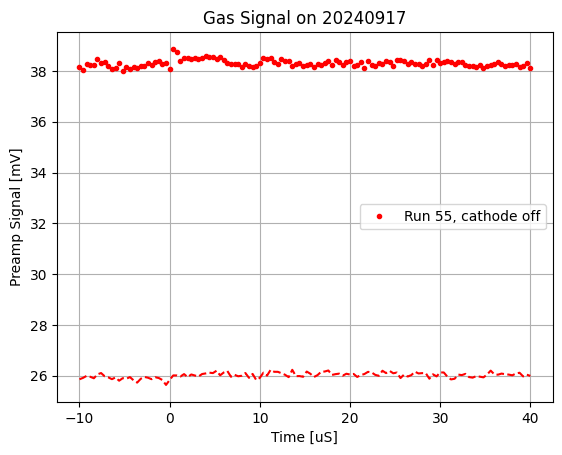

In [53]:
#wafeform_path="/Users/KK_Lab28_1/Documents/Waveforms/" # Path for data on July 7th
wafeform_path="A:/DATA/waveforms/"
waveform_date="20240917"
runnumber="00055"

stepcount=100
waveform_dir=wafeform_path+waveform_date+"-"+runnumber
waveform_wavenumber="10"
waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
DF=pd.read_csv(waveform_fullpath,skiprows=[1])



anodenorm=0#np.average(DF["Average Anode (2)"][:100])
cathnorm=-20#np.average(DF["Average Cathode (2)"][:100])


plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Anode (2)"][::stepcount] - anodenorm, color= "red", fmt=".",label="Run 55, cathode off")
plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Cathode (2)"][::stepcount] - cathnorm, color= "red", fmt="--",)



# runnumber="00065"


# waveform_dir=wafeform_path+waveform_date+"-"+runnumber
# waveform_wavenumber="10"
# waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
# waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
# DF=pd.read_csv(waveform_fullpath,skiprows=[1])


# anodenorm=np.average(DF["Average Anode (2)"][:100])
# cathnorm=np.average(DF["Average Cathode (2)"][:100])

# plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Anode (2)"][::stepcount] - anodenorm, color= "Blue", fmt=".",label="300 v/cm")
# plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Cathode (2)"][::stepcount] - cathnorm, color= "Blue", fmt="--",)


# runnumber="00066"


# waveform_dir=wafeform_path+waveform_date+"-"+runnumber
# waveform_wavenumber="10"
# waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
# waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
# DF=pd.read_csv(waveform_fullpath,skiprows=[1])

# anodenorm=np.average(DF["Average Anode (2)"][:100])
# cathnorm=np.average(DF["Average Cathode (2)"][:100])

# plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Anode (2)"][0::stepcount] - anodenorm, color= "Gray", fmt=".",label="400 v/cm")
# plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Cathode (2)"][::stepcount] - cathnorm, color= "Gray", fmt="--",)




plt.xlabel("Time [uS]")
plt.ylabel("Preamp Signal [mV]")
plt.grid()
plt.legend()
plt.title("Gas Signal on 20240917")
#plt.xlim(-1000,10000)

# Data From Sept 20th

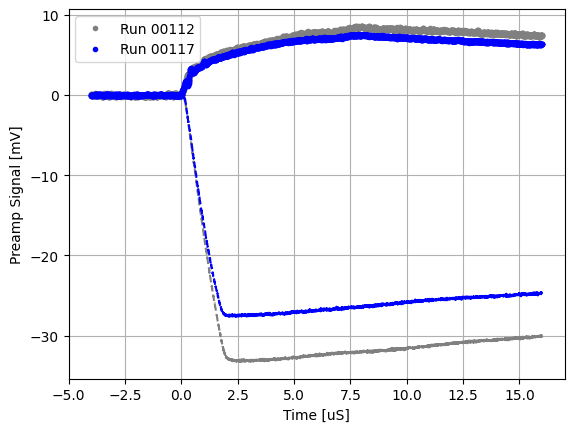

In [12]:
#wafeform_path="/Users/KK_Lab28_1/Documents/Waveforms/" # Path for data on July 7th
wafeform_path="A:/DATA/waveforms/"


# waveform_date="20240920"
# runnumber="00115"

# stepcount=100
# waveform_dir=wafeform_path+waveform_date+"-"+runnumber
# waveform_wavenumber="10"
# waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
# waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
# DF=pd.read_csv(waveform_fullpath,skiprows=[1])



# anodenorm=np.average(DF["average(Anode)"][:100])
# cathnorm=np.average(DF["average(Cathode)"][:100])


# plt.errorbar(x=DF["Time"][::stepcount],y=DF["average(Anode)"][::stepcount] - anodenorm, color= "Gray", fmt=".",label="Run %s"%(runnumber))
# plt.errorbar(x=DF["Time"][::stepcount],y=DF["average(Cathode)"][::stepcount] - cathnorm, color= "Gray", fmt="--",)

waveform_date="20240920"
runnumber="00112"

stepcount=1
waveform_dir=wafeform_path+waveform_date+"-"+runnumber
waveform_wavenumber="10"
waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
DF=pd.read_csv(waveform_fullpath,skiprows=[1])



anodenorm=np.average(DF["average(Anode)"][:100])
cathnorm=np.average(DF["average(Cathode)"][:100])


plt.errorbar(x=DF["Time"][::stepcount],y=DF["average(Anode)"][::stepcount] - anodenorm, color= "Grey", fmt=".",label="Run %s"%(runnumber))
plt.errorbar(x=DF["Time"][::stepcount],y=DF["average(Cathode)"][::stepcount] - cathnorm, color= "Grey", fmt="--",)



# waveform_date="20240920"
# runnumber="00113"

# stepcount=1#00
# waveform_dir=wafeform_path+waveform_date+"-"+runnumber
# waveform_wavenumber="10"
# waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
# waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
# DF=pd.read_csv(waveform_fullpath,skiprows=[1])



# anodenorm=np.average(DF["average(Anode)"][:100])
# cathnorm=np.average(DF["average(Cathode)"][:100])


# plt.errorbar(x=DF["Time"][::stepcount],y=DF["average(Anode)"][::stepcount] - anodenorm, color= "red", fmt=".",label="Run %s"%(runnumber))
# plt.errorbar(x=DF["Time"][::stepcount],y=DF["average(Cathode)"][::stepcount] - cathnorm, color= "red", fmt="--",)


waveform_date="20240926"
runnumber="00117"

stepcount=1
waveform_dir=wafeform_path+waveform_date+"-"+runnumber
waveform_wavenumber="10"
waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
DF=pd.read_csv(waveform_fullpath,skiprows=[1])



anodenorm=np.average(DF["average(Anode)"][:100])
cathnorm=np.average(DF["average(Cathode)"][:100])


plt.errorbar(x=DF["Time"][::stepcount],y=DF["average(Anode)"][::stepcount] - anodenorm, color= "blue", fmt=".",label="Run %s"%(runnumber))
plt.errorbar(x=DF["Time"][::stepcount],y=DF["average(Cathode)"][::stepcount] - cathnorm, color= "blue", fmt="--",)



# runnumber="00065"


# waveform_dir=wafeform_path+waveform_date+"-"+runnumber
# waveform_wavenumber="10"
# waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
# waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
# DF=pd.read_csv(waveform_fullpath,skiprows=[1])


# anodenorm=np.average(DF["Average Anode (2)"][:100])
# cathnorm=np.average(DF["Average Cathode (2)"][:100])

# plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Anode (2)"][::stepcount] - anodenorm, color= "Blue", fmt=".",label="300 v/cm")
# plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Cathode (2)"][::stepcount] - cathnorm, color= "Blue", fmt="--",)


# runnumber="00066"


# waveform_dir=wafeform_path+waveform_date+"-"+runnumber
# waveform_wavenumber="10"
# waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
# waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
# DF=pd.read_csv(waveform_fullpath,skiprows=[1])

# anodenorm=np.average(DF["Average Anode (2)"][:100])
# cathnorm=np.average(DF["Average Cathode (2)"][:100])

# plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Anode (2)"][0::stepcount] - anodenorm, color= "Gray", fmt=".",label="400 v/cm")
# plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Cathode (2)"][::stepcount] - cathnorm, color= "Gray", fmt="--",)




plt.xlabel("Time [uS]")
plt.ylabel("Preamp Signal [mV]")
plt.grid()
plt.legend()
#plt.title()
#plt.xlim(-1000,10000)

# Sept 26th


Text(0.5, 1.0, 'Signal on 20240926')

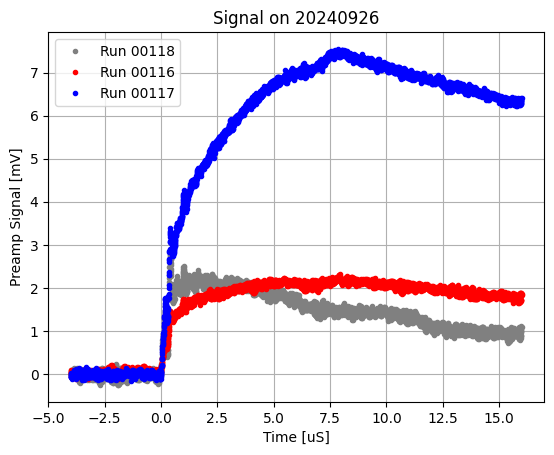

In [3]:
#wafeform_path="/Users/KK_Lab28_1/Documents/Waveforms/" # Path for data on July 7th
wafeform_path="A:/DATA/waveforms/"


# waveform_date="20240920"
# runnumber="00115"

# stepcount=100
# waveform_dir=wafeform_path+waveform_date+"-"+runnumber
# waveform_wavenumber="10"
# waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
# waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
# DF=pd.read_csv(waveform_fullpath,skiprows=[1])



# anodenorm=np.average(DF["average(Anode)"][:100])
# cathnorm=np.average(DF["average(Cathode)"][:100])


# plt.errorbar(x=DF["Time"][::stepcount],y=DF["average(Anode)"][::stepcount] - anodenorm, color= "Gray", fmt=".",label="Run %s"%(runnumber))
# plt.errorbar(x=DF["Time"][::stepcount],y=DF["average(Cathode)"][::stepcount] - cathnorm, color= "Gray", fmt="--",)

waveform_date="20240926"
runnumber="00118"

stepcount=1
waveform_dir=wafeform_path+waveform_date+"-"+runnumber
waveform_wavenumber="10"
waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
DF=pd.read_csv(waveform_fullpath,skiprows=[1])



anodenorm=np.average(DF["average(Anode)"][:100])
cathnorm=np.average(DF["average(Cathode)"][:100])


plt.errorbar(x=DF["Time"][::stepcount],y=DF["average(Anode)"][::stepcount] - anodenorm, color= "Grey", fmt=".",label="Run %s"%(runnumber))
#plt.errorbar(x=DF["Time"][::stepcount],y=DF["average(Cathode)"][::stepcount] - cathnorm, color= "Grey", fmt="--",)



waveform_date="20240926"
runnumber="00116"

stepcount=1
waveform_dir=wafeform_path+waveform_date+"-"+runnumber
waveform_wavenumber="10"
waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
DF=pd.read_csv(waveform_fullpath,skiprows=[1])



anodenorm=np.average(DF["average(Anode)"][:100])
cathnorm=np.average(DF["average(Cathode)"][:100])


plt.errorbar(x=DF["Time"][::stepcount],y=DF["average(Anode)"][::stepcount] - anodenorm, color= "red", fmt=".",label="Run %s"%(runnumber))
#plt.errorbar(x=DF["Time"][::stepcount],y=DF["average(Cathode)"][::stepcount] - cathnorm, color= "red", fmt="--",)


waveform_date="20240926"
runnumber="00117"

stepcount=1
waveform_dir=wafeform_path+waveform_date+"-"+runnumber
waveform_wavenumber="10"
waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
DF=pd.read_csv(waveform_fullpath,skiprows=[1])



anodenorm=np.average(DF["average(Anode)"][:100])
cathnorm=np.average(DF["average(Cathode)"][:100])


plt.errorbar(x=DF["Time"][::stepcount],y=DF["average(Anode)"][::stepcount] - anodenorm, color= "blue", fmt=".",label="Run %s"%(runnumber))
#plt.errorbar(x=DF["Time"][::stepcount],y=DF["average(Cathode)"][::stepcount] - cathnorm, color= "blue", fmt="--",)



# runnumber="00065"


# waveform_dir=wafeform_path+waveform_date+"-"+runnumber
# waveform_wavenumber="10"
# waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
# waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
# DF=pd.read_csv(waveform_fullpath,skiprows=[1])


# anodenorm=np.average(DF["Average Anode (2)"][:100])
# cathnorm=np.average(DF["Average Cathode (2)"][:100])

# plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Anode (2)"][::stepcount] - anodenorm, color= "Blue", fmt=".",label="300 v/cm")
# plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Cathode (2)"][::stepcount] - cathnorm, color= "Blue", fmt="--",)


# runnumber="00066"


# waveform_dir=wafeform_path+waveform_date+"-"+runnumber
# waveform_wavenumber="10"
# waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
# waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
# DF=pd.read_csv(waveform_fullpath,skiprows=[1])

# anodenorm=np.average(DF["Average Anode (2)"][:100])
# cathnorm=np.average(DF["Average Cathode (2)"][:100])

# plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Anode (2)"][0::stepcount] - anodenorm, color= "Gray", fmt=".",label="400 v/cm")
# plt.errorbar(x=DF["Time"][::stepcount],y=DF["Average Cathode (2)"][::stepcount] - cathnorm, color= "Gray", fmt="--",)




plt.xlabel("Time [uS]")
plt.ylabel("Preamp Signal [mV]")
plt.grid()
plt.legend()
plt.title("Signal on 20240926")
#plt.xlim(-1000,10000)

In [5]:
waveform_date="20240926"
runnumber="00116"
waveform_dir=wafeform_path+waveform_date+"-"+runnumber
waveform_wavenumber="10"
waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
DF116=pd.read_csv(waveform_fullpath,skiprows=[1])
waveform_date="20240926"
runnumber="00117"
waveform_dir=wafeform_path+waveform_date+"-"+runnumber
waveform_wavenumber="10"
waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
DF117=pd.read_csv(waveform_fullpath,skiprows=[1])
waveform_date="20240926"
runnumber="00118"
waveform_dir=wafeform_path+waveform_date+"-"+runnumber
waveform_wavenumber="10"
waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
DF118=pd.read_csv(waveform_fullpath,skiprows=[1])

Text(0.5, 1.0, 'Signal on 20240926')

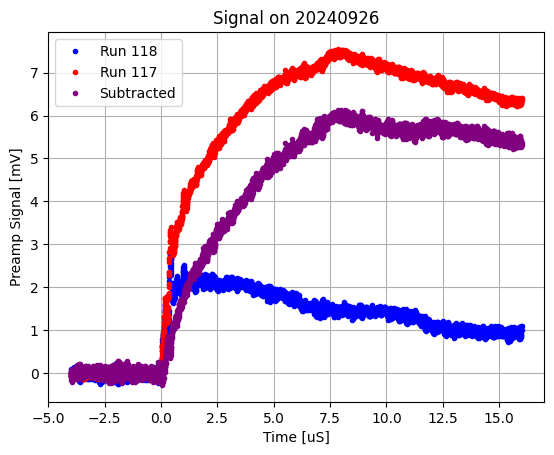

In [7]:
anodenorm118=np.average(DF118["average(Anode)"][:100])
cathnorm118 =np.average(DF118["average(Cathode)"][:100])


plt.errorbar(x=DF118["Time"][::stepcount],y=DF118["average(Anode)"][::stepcount] - anodenorm118, color= "blue", fmt=".",label="Run 118")

anodenorm117=np.average(DF117["average(Anode)"][:100])
cathnorm117= np.average(DF117["average(Cathode)"][:100])


plt.errorbar(x=DF117["Time"][::stepcount],y=DF117["average(Anode)"][::stepcount] - anodenorm117, color= "red", fmt=".",label="Run 117")

plt.errorbar(x=DF117["Time"][::stepcount],y=(DF117["average(Anode)"][::stepcount] - anodenorm117) -(DF118["average(Anode)"][::stepcount] - anodenorm118), color= "purple", fmt=".",label="Subtracted")



plt.xlabel("Time [uS]")
plt.ylabel("Preamp Signal [mV]")
plt.grid()
plt.legend()
plt.title("Signal on 20240926")
#plt.xlim(-1000,10000)

Text(0.5, 1.0, 'Signal on 20240926')

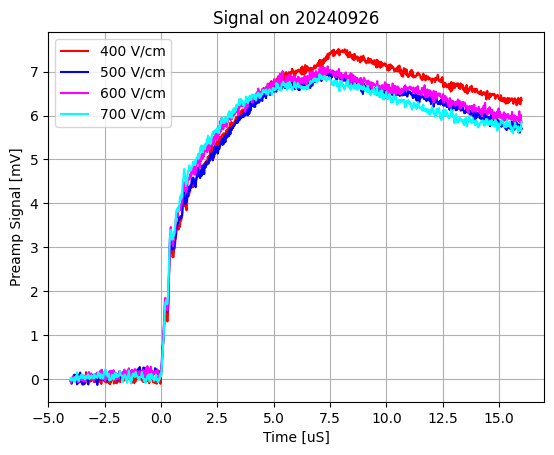

In [15]:
dates = [20240926,20240926,20240926,20240926]
runnumbers= [117,119,120,121]
labels=[400,500,600,700]

c=["red","blue","magenta","cyan"]

for i,rn  in enumerate(runnumbers):
    
    waveform_date ="%i"%(dates[i])
    runnumber="00%i"%(rn)
    stepcount=5
    waveform_dir=wafeform_path+waveform_date+"-"+runnumber
    waveform_wavenumber="10"
    waveform_filename=waveform_date+"-"+runnumber+"_"+waveform_wavenumber
    waveform_fullpath=waveform_dir+"/"+waveform_filename+".csv"
    DF=pd.read_csv(waveform_fullpath,skiprows=[1])



    anodenorm=np.average(DF["average(Anode)"][:100])
    cathnorm=np.average(DF["average(Cathode)"][:100])


    plt.errorbar(x=DF["Time"][::stepcount],y=DF["average(Anode)"][::stepcount] - anodenorm, color= c[i], label="%i V/cm"%(labels[i]))


plt.xlabel("Time [uS]")
plt.ylabel("Preamp Signal [mV]")
plt.grid()
plt.legend()
plt.title("Signal on 20240926")
#plt.xlim(-1000,10000)


In [41]:
import subprocess
rn="119"

flist = glob.glob("A:/DATA/waveforms/20240926-00%s/*"%(rn))
print(flist)
for f in flist:

    f=f.replace("\\","/")
    nename = f.replace("000","00")
    
    print(f,"\n", nename)
    subprocess.Popen(["mv" ,"-v", "%s %s"%(f, nename)])




['A:/DATA/waveforms/20240926-00119\\20240926-000119_01.csv', 'A:/DATA/waveforms/20240926-00119\\20240926-000119_02.csv', 'A:/DATA/waveforms/20240926-00119\\20240926-000119_03.csv', 'A:/DATA/waveforms/20240926-00119\\20240926-000119_04.csv', 'A:/DATA/waveforms/20240926-00119\\20240926-000119_05.csv', 'A:/DATA/waveforms/20240926-00119\\20240926-000119_06.csv', 'A:/DATA/waveforms/20240926-00119\\20240926-000119_07.csv', 'A:/DATA/waveforms/20240926-00119\\20240926-000119_08.csv', 'A:/DATA/waveforms/20240926-00119\\20240926-000119_09.csv', 'A:/DATA/waveforms/20240926-00119\\20240926-000119_10.csv', 'A:/DATA/waveforms/20240926-00119\\20240926-000119_11.csv']
A:/DATA/waveforms/20240926-00119/20240926-000119_01.csv 
 A:/DATA/waveforms/20240926-00119/20240926-00119_01.csv


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [31]:
r=21.5
d=803
rho = 2* np.pi *r/d


Rmin = (1+rho)/(1-rho)
Rmin,rho

(1.4045101211444562, 0.16822974359198145)

In [60]:
r=37/2
d=217
rho = 2* np.pi *r/d


Rmin = (1+rho)/(1-rho)
Rmin

3.3072189703128196

In [41]:
( + (d/(4 *np.pi *1.8 ))* (rho**2 - 4* np.log(rho) ) )

254.1118254637591

In [47]:
(220/1.8) / (366/9.14)

3.0522161505768066

In [61]:
Eq_2_Num=(1 + (d/(4 *np.pi *1.8 ))* (rho**2 - 4* np.log(rho) ) )*(1+rho)
Eq_2_den=(1 + (d/(4 *np.pi *9.14))* (rho**2 - 4* np.log(rho) ) )*(1+rho)


Eq_2_Num/Eq_2_den


4.426346291708176